In [7]:
# https://www.tensorflow.org/tutorials/keras/classification
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [9]:
# ta train_labels einai ta y. Auta pou psaxnoume na broume sumfwna me ta x(train_images)
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
# Scale these values to a range of 0 to 1 before feeding them to the neural network model.
# To do so, divide the values by 255. It's important that the training set and
# the testing set be preprocessed in the same way:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [12]:

# Here we declare we are about to make a Neural network
MYmodel = tf.keras.Sequential()

# Here first we flatten our arrays and then we input them
# and at "...Dense(128,...)" we say that the output is 500 
MYmodel = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(500, activation='sigmoid')])

# Here we dont have to talk about the input since it knows it's coming so
# we have just to declare about the output which is again 128
MYmodel.add(tf.keras.layers.Dense(500, activation='sigmoid'))

# Here we talk about the last layer where it outputs 10 labels
MYmodel.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile
MYmodel.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# we train OUR model
MYmodel.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1127 - accuracy: 0.2922
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1937 - accuracy: 0.6425
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8824 - accuracy: 0.7072
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7466 - accuracy: 0.7387
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6797 - accuracy: 0.7518
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6352 - accuracy: 0.7671
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6070 - accuracy: 0.7785
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5774 - accuracy: 0.7907
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5618 - accuracy: 0.7967
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.543

In [14]:
# Evaluate MYmodel accuracy
test_loss_m, test_acc_m = MYmodel.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc_m)

313/313 - 0s - loss: 0.5522 - accuracy: 0.8011

Test accuracy: 0.8011000156402588


In [15]:
# ~Make predictions of MYMODEL.~
# Now we don't know the labels from before. We just use our test_images
# and we'll try to predict its label.
my_probability_model = tf.keras.Sequential([MYmodel, 
                                         tf.keras.layers.Softmax()])

my_predictions = my_probability_model.predict(test_images)

In [16]:
# Graph this to look at the full set of 10 class predictions.
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

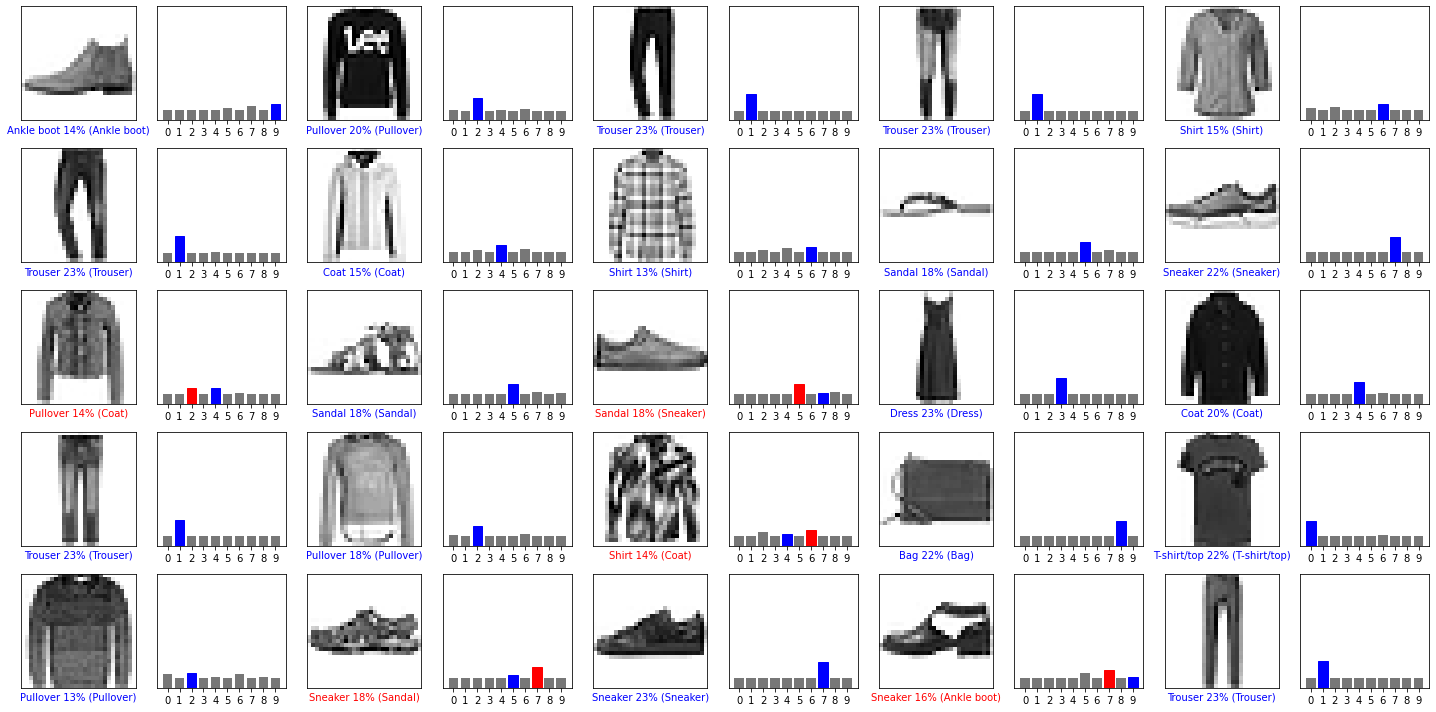

In [17]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
# We'll see if we have over-trained our NN, by changing test_label/image
# to train_label/image
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, my_predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, my_predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [18]:
def getMax(my_predictions):
    predictions = []
    for i in range(10000):
        predictions.append(np.argmax(my_predictions[i]))
    return predictions

In [19]:
predictions = getMax(my_predictions)

In [20]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, predictions,pos_label='positive',average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, predictions,pos_label='positive',average='micro')
print('Recall: %f' % recall)
#f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, predictions,pos_label='positive',average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.801100
Precision: 0.801100
Recall: 0.801100
F1 score: 0.801100


D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
